<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#...-and-the-Cross-Section-of-Expected-Returns" data-toc-modified-id="...-and-the-Cross-Section-of-Expected-Returns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>... and the Cross-Section of Expected Returns</a></span></li><li><span><a href="#Plan-for-Today" data-toc-modified-id="Plan-for-Today-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plan for Today</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Download Data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Share-type---select-only-common-stocks" data-toc-modified-id="Share-type---select-only-common-stocks-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Share type - select only common stocks</a></span></li><li><span><a href="#Select-stocks-traded-on-the-major-stock-exchanges" data-toc-modified-id="Select-stocks-traded-on-the-major-stock-exchanges-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Select stocks traded on the major stock exchanges</a></span></li><li><span><a href="#Delete-missing-returns" data-toc-modified-id="Delete-missing-returns-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Delete missing returns</a></span></li><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Merge data</a></span></li></ul></li><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Summary</a></span></li><li><span><a href="#Forcasting-Future-Excess-Returns" data-toc-modified-id="Forcasting-Future-Excess-Returns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Forcasting Future Excess Returns</a></span><ul class="toc-item"><li><span><a href="#Does-BEME-forcast-future-returns?" data-toc-modified-id="Does-BEME-forcast-future-returns?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Does BEME forcast future returns?</a></span><ul class="toc-item"><li><span><a href="#What-is-the-problem?" data-toc-modified-id="What-is-the-problem?-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>What is the problem?</a></span></li><li><span><a href="#Try-to-run-the-FM-regression-again!" data-toc-modified-id="Try-to-run-the-FM-regression-again!-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Try to run the FM regression again!</a></span></li></ul></li><li><span><a href="#Does-size-forcast-future-returns?" data-toc-modified-id="Does-size-forcast-future-returns?-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Does size forcast future returns?</a></span></li><li><span><a href="#What-about-Fama-and-French-2015?" data-toc-modified-id="What-about-Fama-and-French-2015?-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>What about Fama and French 2015?</a></span></li></ul></li><li><span><a href="#Long-short-portfolio" data-toc-modified-id="Long-short-portfolio-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Long-short portfolio</a></span><ul class="toc-item"><li><span><a href="#Sort-Portfolio" data-toc-modified-id="Sort-Portfolio-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Sort Portfolio</a></span></li><li><span><a href="#Portfolio-returns" data-toc-modified-id="Portfolio-returns-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Portfolio returns</a></span><ul class="toc-item"><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Merge data</a></span></li><li><span><a href="#Calculate-returns" data-toc-modified-id="Calculate-returns-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Calculate returns</a></span></li></ul></li><li><span><a href="#Average-Returns" data-toc-modified-id="Average-Returns-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Average Returns</a></span></li><li><span><a href="#Compare-Sharpe-ratio" data-toc-modified-id="Compare-Sharpe-ratio-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Compare Sharpe-ratio</a></span></li></ul></li></ul></div>

# Lecture Notes 5: Factor Investing 

## ... and the Cross-Section of Expected Returns

1. [Harvey, Liu and Zhu (RFS, 2016)](https://academic.oup.com/rfs/article/29/1/5/1843824)
    1. "Hundreds of papers and factors attempt to explain the cross-section of expected returns."
    2. They [list 313 papers](http://faculty.fuqua.duke.edu/~charvey/Factor-List.xlsx) published in a selection of journals that study cross-sectional return patterns. 

2. The majority of those papers goes: 
    1. We show that stocks with high value of x on average outperform stocks with low value of x.
    2. Is it robust? Run a Fama-MacBeth regression;
    3. Is it explained by risk? Form a long-short portfolio based on the new characteristic sort. Test if this portfolio earns an "alpha" with respect the benchmark model.

## Plan for Today

1. Study the mom vs. short-term reversal strategies;
2. Fama-MacBeth regression;
3. Alpha evaluation

## Set Up

In [1]:
#%% Packages 
import sys
import pandas as pd
import numpy as np
import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 6]
idx = pd.IndexSlice

In [2]:
# Packages from fire_pytools
sys.path.append("/Users/liramertens/src/fire_pytools") 

# Data Import
from data_setup import stock_monthly
from data_setup import stock_annual

# Functions 
from utils.monthly_date import *
from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios
from import_kf.kf_factors import *

## Download Data

In [3]:
#mdata = stock_monthly.main()
#mdata.to_pickle(path = '/Users/liramertens/Dropbox/Columbia/BigData/class2021/data/stock_monthly.pkl')
mdata = pd.read_pickle('/Users/liramertens/Dropbox/Columbia/BigData/class2021/data/stock_monthly.pkl')

In [4]:
#adata = stock_annual.main()
#adata.to_pickle('/Users/liramertens/Dropbox/Columbia/BigData/class2021/data/stock_annual.pkl')

adata = pd.read_pickle('/Users/liramertens/Dropbox/Columbia/BigData/class2021/data/stock_annual.pkl')

In [5]:
# Create excess returns
mdata['exret'] = mdata['retadj'] - mdata['rf']

## Clean Data

### Share type - select only common stocks 

**First Digit - Security Type** <BR>
1	Ordinary Common Shares <BR>
2	Certificates <BR>
3	ADRs (American Depository Receipts) <BR>
4	SBIs (Shares of Beneficial Interest) <BR>
7	Units (Depository Units, Units of Benefic ial Interest, Units of Limited Partnership Interest, Depository Receipts, etc.) <BR> <BR>

**Second Digit - Share Code - Security Type** <BR>
0	Securities which have not been further defined. <BR>
1	Securities which need not be further defined. <BR>
2	Companies incorporated outside the US <BR>
3	Americus Trust Components (Primes and Scores). <BR>
4	Closed-end funds. <BR>
5	Closed-end fund companies incorporated outside the US <BR>
8	REIT's (Real Estate Investment Trusts). <BR>

In [6]:
mdata.shrcd.isin([10, 11]).mean() * 100 

78.40566805133187

In [7]:
mdata = mdata[mdata.shrcd.isin([10, 11])]

### Select stocks traded on the major stock exchanges

-2	Halted by the NYSE or AMEX <BR>
-1	Suspended by the NYSE, AMEX, or NASDAQ <BR>
0	Not Trading on NYSE, AMEX, or NASDAQ <BR>
1	New York Stock Exchange <BR>
2	American Stock Exchange <BR>
3	The Nasdaq Stock Market(SM) <BR>
4	The Arca Stock Market(SM) <BR>
5	Mutual Funds (As Quoted by NASDAQ) <BR>
10	Boston Stock Exchange <BR>
13	Chicago Stock Exchange <BR>
16	Pacific Stock Exchange <BR>
17	Philadelphia Stock Exchange <BR>
19	Toronto Stock Exchange <BR>
20	Over-The-Counter (Non-NASDAQ Dealer Quotations) <BR>
31	When-issued trading on the NYSE <BR>
32	When-issued trading on the AMEX <BR>
33	When-issued trading on The NASDAQ <BR>

In [8]:
mdata.exchcd.isin([1, 2, 3]).mean()

0.9843038116175234

In [9]:
mdata = mdata[mdata.exchcd.isin([1, 2, 3])]

### Delete missing returns

In [10]:
mdata = mdata[mdata['exret'].notnull()]
mdata = mdata[mdata['lag_me'].notnull()]

### Merge data

Our objective: find stock characteristics that forecast **FUTURE** returns. <BR><BR>
$$r_{i,t+1} = \alpha + \beta c_{i,t} + \varepsilon_{i,t+1} $$


In [11]:
# Example: APPLE
adata[['permno', 'gvkey', 'tic', 'fyear', 'datadate', 'rankyear', 'beme']][adata.permno==14593]

permno   gvkey   tic   fyear   datadate  rankyear      beme
52066   14593     NaN   NaN     NaN        NaT    1981.0       NaN
52067   14593  001690  AAPL  1981.0 1981-09-30    1982.0  0.000149
52068   14593  001690  AAPL  1982.0 1982-09-30    1983.0  0.000157
52069   14593  001690  AAPL  1983.0 1983-09-30    1984.0  0.000295
52070   14593  001690  AAPL  1984.0 1984-09-30    1985.0  0.000302
52071   14593  001690  AAPL  1985.0 1985-09-30    1986.0  0.000468
52072   14593  001690  AAPL  1986.0 1986-09-30    1987.0  0.000327
52073   14593  001690  AAPL  1987.0 1987-09-30    1988.0  0.000192
52074   14593  001690  AAPL  1988.0 1988-09-30    1989.0  0.000253
52075   14593  001690  AAPL  1989.0 1989-09-30    1990.0  0.000419
52076   14593  001690  AAPL  1990.0 1990-09-30    1991.0  0.000396
52077   14593  001690  AAPL  1991.0 1991-09-30    1992.0  0.000341
52078   14593  001690  AAPL  1992.0 1992-09-30    1993.0  0.000397
52079   14593  001690  AAPL  1993.0 1993-09-30    1994.0  0.000595
52080   14593  001690  AAPL  1994.0 1994-09-30    1995.0  0.000510
52081   14593  001690  AAPL  1995.0 1995-09-30    1996.0  0.000739
52082   14593  001690  AAPL  1996.0 1996-09-30    1997.0  0.000791
52083   14593  001690  AAPL  1997.0 1997-09-30    1998.0  0.000625
52084   14593  001690  AAPL  1998.0 1998-09-30    1999.0  0.000267
52085   14593  001690  AAPL  1999.0 1999-09-30    2000.0  0.000178
52086   14593  001690  AAPL  2000.0 2000-09-30    2001.0  0.000785
52087   14593  001690  AAPL  2001.0 2001-09-30    2002.0  0.000508
52088   14593  001690  AAPL  2002.0 2002-09-30    2003.0  0.000793
52089   14593  001690  AAPL  2003.0 2003-09-30    2004.0  0.000536
52090   14593  001690  AAPL  2004.0 2004-09-30    2005.0  0.000195
52091   14593  001690  AAPL  2005.0 2005-09-30    2006.0  0.000123
52092   14593  001690  AAPL  2006.0 2006-09-30    2007.0  0.000137
52093   14593  001690  AAPL  2007.0 2007-09-30    2008.0  0.000083
52094   14593  001690  AAPL  2008.0 2008-09-30    2009.0  0.000277
52095   14593  001690  AAPL  2009.0 2009-09-30    2010.0  0.000166
52096   14593  001690  AAPL  2010.0 2010-09-30    2011.0  0.000161
52097   14593  001690  AAPL  2011.0 2011-09-30    2012.0  0.000203
52098   14593  001690  AAPL  2012.0 2012-09-30    2013.0  0.000237
52099   14593  001690  AAPL  2013.0 2013-09-30    2014.0  0.000247
52100   14593  001690  AAPL  2014.0 2014-09-30    2015.0  0.000173
52101   14593  001690  AAPL  2015.0 2015-09-30    2016.0  0.000205
52102   14593  001690  AAPL  2016.0 2016-09-30    2017.0  0.000211
52103   14593  001690  AAPL  2017.0 2017-09-30    2018.0  0.000156
52104   14593  001690  AAPL  2018.0 2018-09-30    2019.0  0.000144
52105   14593  001690  AAPL  2019.0 2019-09-30    2020.0  0.000070
52106   14593  001690  AAPL  2020.0 2020-09-30    2021.0  0.000029

In [13]:
mdata[mdata.permno==14593][['permno', 'date', 'exret']]

permno       date     exret
603106   14593 1981-01-30 -0.179975
603107   14593 1981-02-27 -0.072359
603108   14593 1981-03-31 -0.088274
603109   14593 1981-04-30  0.146604
603110   14593 1981-05-29  0.153828
...        ...        ...       ...
603581   14593 2020-08-31  0.216230
603582   14593 2020-09-30 -0.102602
603583   14593 2020-10-30 -0.060085
603584   14593 2020-11-30  0.095424
603585   14593 2020-12-31  0.114514

[480 rows x 3 columns]

In [14]:
# Portfolios are rebalanced in the end of june
mdata['rankyear'] = mdata.date.dt.year
mdata.loc[mdata.date.dt.month <= 6, 'rankyear'] = mdata.loc[mdata.date.dt.month <= 6, 'rankyear'] - 1

In [16]:
mdata[['permno', 'date', 'rankyear', 'exchcd', 'exret', 'lag_me']][mdata.permno==14593]

permno       date  rankyear  exchcd     exret        lag_me
603106   14593 1981-01-30      1980     3.0 -0.179975  1.884962e+03
603107   14593 1981-02-27      1980     3.0 -0.072359  1.564484e+03
603108   14593 1981-03-31      1980     3.0 -0.088274  1.467996e+03
603109   14593 1981-04-30      1980     3.0  0.146604  1.357724e+03
603110   14593 1981-05-29      1980     3.0  0.153828  1.571376e+03
...        ...        ...       ...     ...       ...           ...
603581   14593 2020-08-31      2020     3.0  0.216230  1.817316e+06
603582   14593 2020-09-30      2020     3.0 -0.102602  2.206911e+06
603583   14593 2020-10-30      2020     3.0 -0.060085  1.966079e+06
603584   14593 2020-11-30      2020     3.0  0.095424  1.850816e+06
603585   14593 2020-12-31      2020     3.0  0.114514  2.024065e+06

[480 rows x 6 columns]

In [17]:
fdata = pd.merge(mdata[['permno', 'date', 'ticker', 'rankyear', 'exchcd', 'exret', 'retadj', 'lag_me', 'rf']],
                 adata[['permno', 'gvkey', 'conm', 'fyear', 'datadate', 'rankyear', 'mesum_dec', 'beme', 'opbe', 'inv_gvkey']],
                 on = ['permno','rankyear' ])

In [18]:
fdata.rename(columns = {'inv_gvkey': 'inv'}, inplace = True)
fdata.rename(columns = {'mesum_dec': 'mesum'}, inplace = True)

## Data Summary

In [19]:
fdata.describe()

permno      rankyear        exchcd         exret        retadj  \
count  3.466394e+06  3.466394e+06  3.466394e+06  3.466394e+06  3.466394e+06   
mean   4.986116e+04  1.987685e+03  2.108364e+00  8.325099e-03  1.193549e-02   
std    2.818388e+04  2.013566e+01  9.303086e-01  1.793996e-01  1.793229e-01   
min    1.000000e+04  1.926000e+03  1.000000e+00 -1.014149e+00 -1.000000e+00   
25%    2.156500e+04  1.977000e+03  1.000000e+00 -6.707600e-02 -6.329114e-02   
50%    4.857300e+04  1.990000e+03  2.000000e+00 -3.150000e-03  0.000000e+00   
75%    7.817900e+04  2.002000e+03  3.000000e+00  6.684116e-02  7.018867e-02   
max    9.343600e+04  2.020000e+03  3.000000e+00  2.399694e+01  2.400000e+01   

             lag_me            rf         fyear         mesum          beme  \
count  3.466394e+06  3.466394e+06  3.107792e+06  3.086159e+06  2.961937e+06   
mean   1.621800e+03  3.610395e-03  1.987537e+03  1.725624e+06  1.037157e-03   
std    1.290709e+04  2.676661e-03  2.029691e+01  1.302105e+07  4.219183e-03   
min    0.000000e+00 -2.650000e-04  1.925000e+03  2.475000e+01  1.227392e-08   
25%    1.661527e+01  1.390000e-03  1.977000e+03  1.883166e+04  3.781366e-04   
50%    7.067122e+01  3.760000e-03  1.991000e+03  8.182200e+04  6.800593e-04   
75%    3.848890e+02  5.002000e-03  2.002000e+03  4.393851e+05  1.150185e-03   
max    2.206911e+06  1.515800e-02  2.019000e+03  1.287643e+09  1.250093e+00   

               opbe           inv  
count  2.670738e+06  2.709967e+06  
mean   1.121922e-02  1.348173e+00  
std    4.908140e+01  1.916025e+02  
min   -2.261400e+04 -9.998177e-01  
25%    8.269284e-02 -8.267286e-03  
50%    2.131624e-01  8.054719e-02  
75%    3.224172e-01  2.195771e-01  
max    3.141250e+03  9.758400e+04

## Forcasting Future Excess Returns

In [20]:
# FamaMacBeth regression
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params

def fm_summary(p):
    s = p.describe().T
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    return s[['mean','std_error','tstat']]

### Does BEME forcast future returns?

In [21]:
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + beme'))
gamma_beme.head()

Intercept      beme
date                           
1926-07-31   0.012579  5.882302
1926-08-31   0.009899  2.373429
1926-09-30  -0.013706  6.392941
1926-10-30  -0.037200 -0.149101
1926-11-30   0.017929  8.330296

#### What is the problem? 

In [23]:
fdata.dropna(subset=['mesum', 'beme', 'opbe', 'inv'], inplace = True)

<AxesSubplot:xlabel='date'>

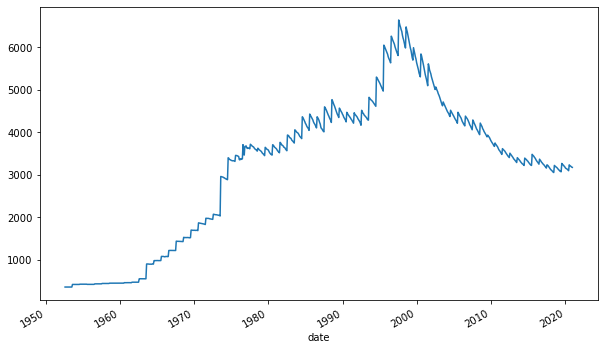

In [24]:
fdata.groupby('date').count().rankyear.plot()

In [25]:
fdata = fdata[fdata.rankyear>=1963]

#### Try to run the FM regression again!

In [26]:
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + beme'))
gamma_beme.head(100)

Intercept        beme
date                             
1963-07-31  -0.007044   -4.219598
1963-08-30   0.050866   -5.123094
1963-09-30  -0.029226    9.070742
1963-10-31   0.009961    4.870460
1963-11-29  -0.010876   -0.785809
1963-12-31   0.009753   -6.285783
1964-01-31   0.010818   11.053165
1964-02-28   0.013527    5.801361
1964-03-31   0.011862   19.477470
1964-04-30  -0.008082    1.643818
1964-05-28   0.004774    2.346277
1964-06-30   0.016483   -1.072926
1964-07-31   0.020992    7.346564
1964-08-31  -0.004802   -0.625724
1964-09-30   0.035341   -3.023412
1964-10-30   0.008063   10.329385
1964-11-30   0.003439   -4.538505
1964-12-31   0.001824  -11.184644
1965-01-29   0.049390    9.425900
1965-02-26   0.022049    6.149200
1965-03-31  -0.015546   19.886630
1965-04-30   0.031695    4.888303
1965-05-28  -0.006103    4.457840
1965-06-30  -0.068196  -13.141407
1965-07-30   0.013935   11.686814
1965-08-31   0.045824   -8.157816
1965-09-30   0.024402    5.395268
1965-10-29   0.030363   19.530028
1965-11-30   0.019556   19.206821
1965-12-31   0.017219   19.503237
1966-01-31   0.024792   23.555374
1966-02-28  -0.004298   22.497706
1966-03-31  -0.012568   -8.660918
1966-04-29   0.031068    7.441593
1966-05-31  -0.061470  -20.683717
1966-06-30  -0.010498    4.206926
1966-07-29  -0.018650    5.384477
1966-08-31  -0.097915   -1.407150
1966-09-30  -0.018667    1.199561
1966-10-31  -0.000305   -2.026996
1966-11-30   0.053453  -30.519984
1966-12-30   0.023674  -13.708206
1967-01-31   0.129699   26.613122
1967-02-28   0.020192   12.513558
1967-03-31   0.054776   -3.051519
1967-04-28   0.040288   -1.444077
1967-05-31  -0.025151   14.253507
1967-06-30   0.049174   21.813294
1967-07-31   0.057234   23.045623
1967-08-31  -0.012495   13.848747
1967-09-29   0.051545    7.050916
1967-10-31  -0.027120    2.313729
1967-11-30   0.004118   -6.976542
1967-12-29   0.061501   11.919610
1968-01-31  -0.027223   43.548589
1968-02-29  -0.059906    3.662301
1968-03-29  -0.013026   -0.049011
1968-04-30   0.119085   17.262736
1968-05-31   0.064976   16.257933
1968-06-28   0.004146    8.469804
1968-07-30  -0.061079   45.162486
1968-08-30   0.020900   16.403245
1968-09-30   0.052990   19.455264
1968-10-31  -0.005960   16.403706
1968-11-29   0.074846  -10.853955
1968-12-31  -0.007239    6.755730
1969-01-31  -0.016128    9.057235
1969-02-28  -0.095486   12.799359
1969-03-28   0.015196    0.440609
1969-04-30   0.003686   -5.987505
1969-05-29  -0.001260    2.287849
1969-06-30  -0.116496    3.610519
1969-07-31  -0.111845   26.642968
1969-08-29   0.065811  -46.620672
1969-09-30  -0.028403   -6.031030
1969-10-31   0.108556  -46.549683
1969-11-28  -0.061040   -1.404939
1969-12-31  -0.065077   -9.282180
1970-01-30  -0.067019   43.290923
1970-02-27   0.025018   24.407973
1970-03-31  -0.056705   64.975068
1970-04-30  -0.212228  109.993997
1970-05-29  -0.099763   12.528107
1970-06-30  -0.099732   38.411691
1970-07-31   0.058721   -3.928422
1970-08-31   0.062488   -6.389958
1970-09-30   0.141535  -27.787160
1970-10-30  -0.071933    8.204302
1970-11-30   0.004821   -2.070695
1970-12-31   0.065558   19.071194
1971-01-29   0.105138   31.433558
1971-02-26   0.046028   -6.416626
1971-03-31   0.057765   -3.899215
1971-04-30   0.021666    4.765577
1971-05-28  -0.046952   -9.917499
1971-06-30  -0.010480  -12.675601
1971-07-30  -0.060745    0.635531
1971-08-31   0.028281   11.744197
1971-09-30  -0.000058  -11.214315
1971-10-29  -0.058058   -4.368482

<AxesSubplot:xlabel='date'>

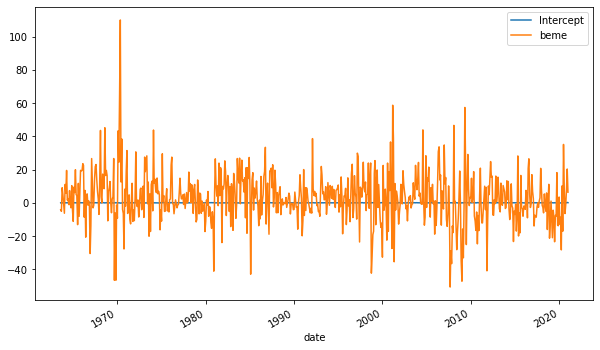

In [27]:
gamma_beme.plot()

<AxesSubplot:>

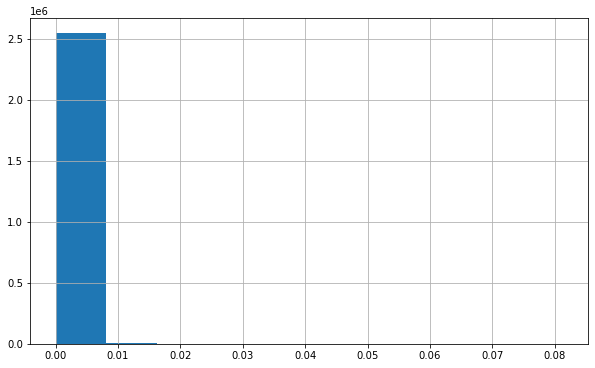

In [28]:
fdata.beme.hist()

In [29]:
# Fama-Macbeth regressions results
fm_summary(gamma_beme)

mean  std_error     tstat
Intercept  0.005811   0.002305  2.521435
beme       3.034375   0.571778  5.306914

<AxesSubplot:xlabel='date'>

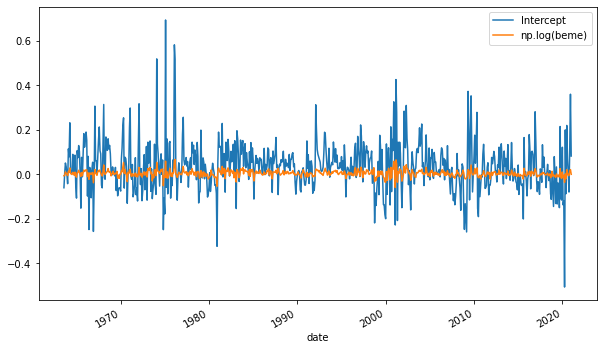

In [30]:
# Try log 
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(beme)'))
gamma_beme.plot()

In [31]:
# Fama-Macbeth regressions results
fm_summary(gamma_beme)

mean  std_error     tstat
Intercept     0.034826   0.004158  8.375046
np.log(beme)  0.003605   0.000555  6.492134

In [32]:
fm_summary(gamma_beme.loc['2010-01-01':])

mean  std_error     tstat
Intercept     0.009210   0.009242  0.996581
np.log(beme) -0.000259   0.000953 -0.271714

In [33]:
fm_summary(gamma_beme.loc[:'2006-12-31'])

mean  std_error     tstat
Intercept     0.044681   0.004629  9.651537
np.log(beme)  0.004920   0.000667  7.379641

### Does size forcast future returns?

<AxesSubplot:xlabel='date'>

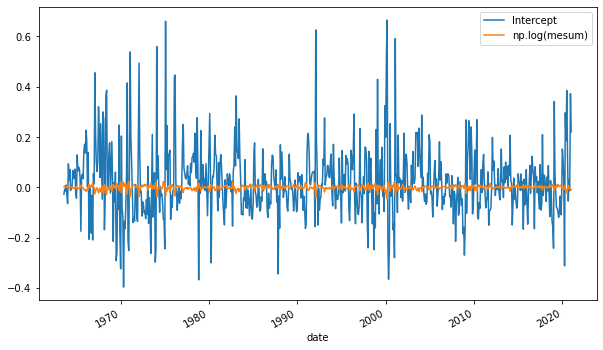

In [34]:
gamma_me = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(mesum)'))
gamma_me.plot()

In [35]:
# Fama-Macbeth regressions results
fm_summary(gamma_me) 

mean  std_error     tstat
Intercept      0.021083   0.005236  4.026646
np.log(mesum) -0.001149   0.000347 -3.308653

In [36]:
fm_summary(gamma_me['2010-01-01':]) 

mean  std_error     tstat
Intercept      0.010729   0.009586  1.119312
np.log(mesum)  0.000050   0.000524  0.094931

### What about Fama and French 2015?

In [37]:
gamma_f5 = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(mesum)+ np.log(beme) + opbe + inv'))
gamma_f5.head()

Intercept  np.log(mesum)  np.log(beme)      opbe       inv
date                                                                  
1963-07-31  -0.063456       0.000131     -0.007151  0.000625 -0.008180
1963-08-30  -0.009694       0.004706     -0.000478  0.001943 -0.006899
1963-09-30   0.045898       0.001518      0.011616  0.003391 -0.009727
1963-10-31   0.042084       0.001511      0.006839  0.016980  0.003090
1963-11-29  -0.008209       0.002361      0.003914  0.002199 -0.025033

<AxesSubplot:xlabel='date'>

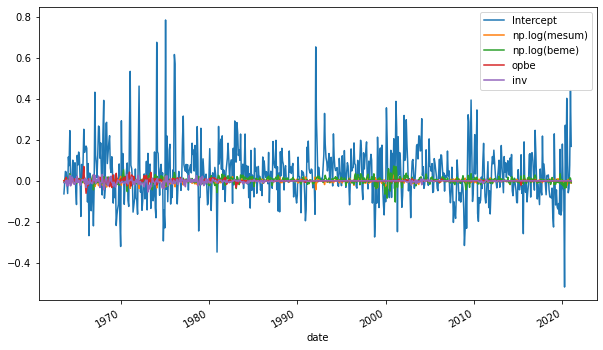

In [38]:
gamma_f5.plot()

In [39]:
fm_summary(gamma_f5) 

mean  std_error     tstat
Intercept      0.036883   0.005062  7.286641
np.log(mesum) -0.000875   0.000374 -2.337800
np.log(beme)   0.002542   0.000612  4.153599
opbe           0.000484   0.000290  1.669994
inv           -0.001918   0.000330 -5.810855

## Long-short portfolio

### Sort Portfolio

In [40]:
port = sort_portfolios(data = fdata,
                       quantiles={'mesum': [0.5],
                                  'beme': [0.3, 0.7],
                                  'opbe': [0.3, 0.7],
                                  'inv': [0.3, 0.7]},
                       id_variables=['rankyear', 'permno', 'exchcd'],
                       exch_cd=[1])  

NYSE breakpoints were calculated for mesum.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for beme.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for opbe.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for inv.
Stocks were sorted according to breakpoints, starting in 1963


Look at the data.

In [41]:
port.head()

rankyear   permno invportfolio opbeportfolio bemeportfolio mesumportfolio
0      1963  10006.0         inv1         opbe1         beme3         mesum2
1      1963  10014.0         inv2         opbe1         beme3         mesum1
2      1963  10102.0         inv3         opbe2         beme2         mesum2
3      1963  10137.0         inv2         opbe3         beme1         mesum2
4      1963  10145.0         inv3         opbe2         beme2         mesum2

In [47]:
port[port.exch_cd==1].groupby(['rankyear','mesumportfolio']).mesumportfolio.count()

AttributeError: 'DataFrame' object has no attribute 'exch_cd'

### Portfolio returns

#### Merge data

In [48]:
port_ret = pd.merge(fdata[['permno', 'date', 'rankyear', 'exret', 'retadj', 'lag_me', 'ticker', 'conm', 'rf']], 
                port,
                on = ['permno', 'rankyear']) 

Have a look at Apple in 2019. Which portfolio did Apple belong to?

In [49]:
port_ret[(port_ret.ticker=='AAPL') & (port_ret.date=='2020-12-31')]

permno       date  rankyear     exret    retadj        lag_me ticker  \
272292   14593 2020-12-31      2020  0.114514  0.114574  2.024065e+06   AAPL   

             conm       rf invportfolio opbeportfolio bemeportfolio  \
272292  APPLE INC  0.00006         inv1         opbe3         beme1   

       mesumportfolio  
272292         mesum2

#### Calculate returns

In [50]:
beme_ret = port_ret.groupby(['date', 'mesumportfolio', 'bemeportfolio']).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))

In [51]:
beme_ret

date        mesumportfolio  bemeportfolio
1963-07-31  mesum1          beme1           -0.009966
                            beme2           -0.010398
                            beme3           -0.017684
            mesum2          beme1            0.001266
                            beme2            0.004736
                                               ...   
2020-12-31  mesum1          beme2            0.089458
                            beme3            0.070634
            mesum2          beme1            0.043112
                            beme2            0.040759
                            beme3            0.057439
Length: 4140, dtype: float64

In [52]:
beme_ret = beme_ret.unstack(level=[1, 2])
beme_ret

mesumportfolio    mesum1                        mesum2                    
bemeportfolio      beme1     beme2     beme3     beme1     beme2     beme3
date                                                                      
1963-07-31     -0.009966 -0.010398 -0.017684  0.001266  0.004736 -0.012069
1963-08-30      0.058207  0.048853  0.052077  0.054856  0.046487  0.076686
1963-09-30     -0.036712 -0.012891 -0.016879 -0.015210 -0.006838 -0.005388
1963-10-31      0.010595  0.016415  0.030219  0.045226  0.016464  0.028405
1963-11-29     -0.023275 -0.014515 -0.004822 -0.011832  0.004539 -0.011713
...                  ...       ...       ...       ...       ...       ...
2020-08-31      0.068058  0.041595  0.064137  0.095550  0.032525  0.053133
2020-09-30      0.000787 -0.030060 -0.058343 -0.041426 -0.024182 -0.044251
2020-10-30      0.013374  0.003912  0.033315 -0.029358 -0.007560  0.002166
2020-11-30      0.206779  0.171371  0.179628  0.105130  0.141396  0.187518
2020-12-31      0.117731  0.089458  0.070634  0.043112  0.040759  0.057439

[690 rows x 6 columns]

<AxesSubplot:xlabel='date'>

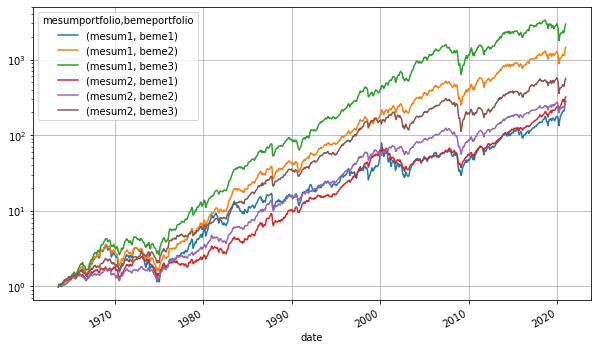

In [53]:
(1+beme_ret).cumprod().plot(grid=True, logy=True)

In [54]:
# HML returns
beme_ret['hml'] = beme_ret.loc[:, idx[:, 'beme3']].mean(axis=1) - beme_ret.loc[:, idx[:, 'beme1']].mean(axis=1)

In [55]:
rf_data = mdata.loc[(mdata.date >= '1963-07-01') , ['date','rf']].drop_duplicates()
rf_data.set_index('date', inplace = True)

<AxesSubplot:xlabel='date'>

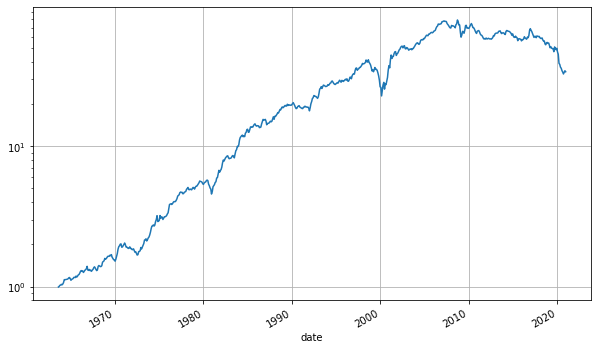

In [56]:
(1+beme_ret['hml'].add(rf_data['rf'], axis = 'index')).cumprod().plot(grid=True, logy = True)

In [57]:
# Characteristic: beme
# --------------------
charvars = ['mesum', 'beme']
beme_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
beme_ret = beme_ret.unstack(level=[1, 2])
beme_ret['hml'] = beme_ret.loc[:, idx[:, 'beme3']].mean(axis=1) - beme_ret.loc[:, idx[:, 'beme1']].mean(axis=1)

In [58]:
# Characteristic: op
# -------------------
charvars = ['mesum', 'opbe']
op_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
op_ret = op_ret.unstack(level=[1, 2])
op_ret['rmw'] = op_ret.loc[:, idx[:, 'opbe3']].mean(axis=1) - op_ret.loc[:, idx[:, 'opbe1']].mean(axis=1)
del charvars

In [59]:
# Characteristic: inv
# -------------------
charvars = ['mesum', 'inv']
inv_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
inv_ret = inv_ret.unstack(level=[1, 2])
inv_ret['cma'] = inv_ret.loc[:, idx[:, 'inv1']].mean(axis=1) - inv_ret.loc[:, idx[:, 'inv3']].mean(axis=1)
del charvars

In [60]:
# Characteristic: size
# --------------------
fret = pd.DataFrame()
fret['smb'] = (beme_ret.loc[:, 'mesum1'].mean(axis=1) - beme_ret.loc[:,'mesum2'].mean(axis=1) +
               op_ret.loc[:, 'mesum1'].mean(axis=1) - op_ret.loc[:,'mesum2'].mean(axis=1) +
               inv_ret.loc[:, 'mesum1'].mean(axis=1) - inv_ret.loc[:,'mesum2'].mean(axis=1))*(1/3)

In [61]:
# %% Aggregate all
beme_ret.columns = [''.join(col).strip() for col in beme_ret.columns.values]
op_ret.columns = [''.join(col).strip() for col in op_ret.columns.values]
inv_ret.columns = [''.join(col).strip() for col in inv_ret.columns.values]

In [62]:
fret = fret.join(beme_ret[['hml']]).join(op_ret[['rmw']]).join(inv_ret[['cma']])

In [63]:
fret  

smb       hml       rmw       cma
date                                              
1963-07-31 -0.011667 -0.010527  0.006593 -0.014627
1963-08-30 -0.003393  0.007850  0.001588 -0.001887
1963-09-30 -0.009623  0.014828 -0.006653  0.004186
1963-10-31 -0.010657  0.001401  0.025885 -0.024073
1963-11-29 -0.006882  0.009286 -0.001701  0.019459
...              ...       ...       ...       ...
2020-08-31 -0.011832 -0.023169  0.041838 -0.023090
2020-09-30  0.007223 -0.030977 -0.011171 -0.036372
2020-10-30  0.034714  0.025732 -0.000432  0.000048
2020-11-30  0.052047  0.027619 -0.029277  0.004933
2020-12-31  0.047774 -0.016385  0.000953 -0.006064

[690 rows x 4 columns]

<AxesSubplot:xlabel='date'>

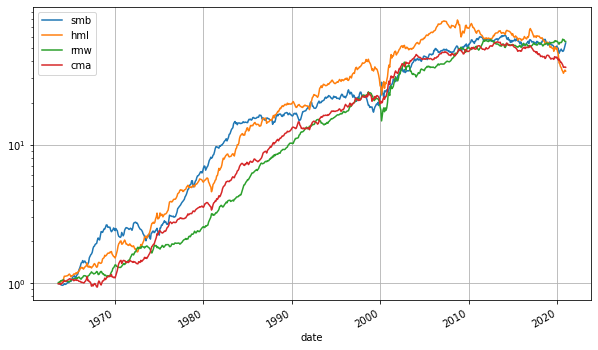

In [64]:
(1+fret.add(rf_data['rf'], axis = 'index')).cumprod().plot(grid=True, logy = True)

### Average Returns

In [65]:
fret.mean()*100*12

smb    3.018054
hml    2.222143
rmw    2.838576
cma    2.061873
dtype: float64

### Compare Sharpe-ratio

In [66]:
(fret.mean()/fret.std())*np.sqrt(12)

smb    0.293418
hml    0.215957
rmw    0.368843
cma    0.283391
dtype: float64